<h1>Convolutional Neural Networks (CNN) for Image Classification</h1>

<h2>MNIST Digit Recognition</h2>

<p><b>Code written by Seetha Parameswaran</b></p>

<hr>

<h3>Overview</h3>
<p>This exercise demonstrates <b>Convolutional Neural Networks (CNNs)</b> for image classification using the MNIST handwritten digit dataset (0-9).</p>

<h4>CNN Components:</h4>
<ul>
  <li><b>Conv2D</b>: Extract spatial features</li>
  <li><b>MaxPooling2D</b>: Downsample feature maps</li>
  <li><b>GlobalAveragePooling2D</b>: Replace Flatten (reduces parameters)</li>
  <li><b>Dense + Softmax</b>: Classification layer</li>
</ul>

<hr>

<h3>Learning Outcomes</h3>
<ul>
  <li>✓ Build custom CNN with Keras</li>
  <li>✓ Implement Global Average Pooling</li>
  <li>✓ Evaluate with accuracy, precision, recall, F1-score</li>
  <li>✓ Visualize training curves and confusion matrix</li>
</ul>

<hr>

<h3>Network Architecture</h3>
<pre>
Input (28×28×1)
   ↓
Conv2D (32 filters, 3×3) + ReLU
   ↓
MaxPooling2D (2×2)
   ↓
Conv2D (64 filters, 3×3) + ReLU
   ↓
MaxPooling2D (2×2)
   ↓
GlobalAveragePooling2D
   ↓
Dense (10) + Softmax
</pre>

In [3]:
# Import Libraries
# pip install tensorflow
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)
import random

2026-01-13 08:36:13.240861: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-13 08:36:13.241321: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-13 08:36:13.286177: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-13 08:36:14.684540: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-poin

In [4]:
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

## PART 1: LOAD AND PREPROCESS MNIST DATASET


In [5]:
print("\n[1] Loading MNIST dataset...")
mnist = tf.keras.datasets.mnist
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()


[1] Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
print(f"Original shapes - Train: {Xtrain.shape}, Test: {Xtest.shape}")

Original shapes - Train: (60000, 28, 28), Test: (10000, 28, 28)


In [7]:
# Reshape to add channel dimension (28, 28) -> (28, 28, 1)
Xtrain = Xtrain.reshape((60000, 28, 28, 1))
Xtest = Xtest.reshape((10000, 28, 28, 1))

In [8]:
# Normalize to [0, 1]
Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0

In [9]:
# Convert labels to categorical
Ytrain_cat = to_categorical(Ytrain, 10)
Ytest_cat = to_categorical(Ytest, 10)

In [10]:
print(f"After preprocessing - Train: {Xtrain.shape}, Test: {Xtest.shape}")
print(f"Label shapes - Train: {Ytrain_cat.shape}, Test: {Ytest_cat.shape}")

After preprocessing - Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Label shapes - Train: (60000, 10), Test: (10000, 10)


##  PART 2: BUILD CUSTOM CNN MODEL

In [11]:
print("\n[2] Building custom CNN architecture...")


[2] Building custom CNN architecture...


In [12]:
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten and Dense layers (traditional approach)
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    # Output layer
    layers.Dense(10, activation='softmax')
])

/opt/conda/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1768293387.663075     678 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1768293387.726117     678 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [13]:
# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
print("\nModel Architecture:")
model.summary()


Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## PART 3: TRAIN MODEL

In [15]:
print("\n[3] Training model...")
history = model.fit(
    Xtrain, Ytrain_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)


[3] Training model...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 103ms/step - accuracy: 0.9093 - loss: 0.2997 - val_accuracy: 0.9835 - val_loss: 0.0574
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9713 - loss: 0.0993 - val_accuracy: 0.9868 - val_loss: 0.0442
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.9783 - loss: 0.0716 - val_accuracy: 0.9893 - val_loss: 0.0396
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9818 - loss: 0.0582 - val_accuracy: 0.9895 - val_loss: 0.0379
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9853 - loss: 0.0501 - val_accuracy: 0.9907 - val_loss: 0.0356
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.9866 - loss: 0.0431 - val_accuracy: 0.9912 - val_loss: 0.0360
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 103ms/step - accuracy: 0.9889 - loss: 0.0383 - val_accuracy: 0.9910 - val_loss: 0.0337
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 112ms/step - accurac

In [16]:
# Track initial and final loss
initial_loss = history.history['loss'][0]
final_loss = history.history['loss'][-1]

In [17]:
print(f"\nInitial training loss: {initial_loss:.4f}")
print(f"Final training loss:   {final_loss:.4f}")


Initial training loss: 0.2997
Final training loss:   0.0271


## PART 4: EVALUATE MODEL

In [18]:
print("\n[4] Evaluating model on test set...")
test_loss, test_accuracy = model.evaluate(Xtest, Ytest_cat, verbose=0)


[4] Evaluating model on test set...


In [19]:
print(f"Test Loss:     {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss:     0.0236
Test Accuracy: 0.9922


In [20]:
# Get predictions
Y_pred = model.predict(Xtest)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Ytest_cat, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [21]:
# Calculate all metrics
accuracy = accuracy_score(Y_test_classes, Y_pred_classes)
precision = precision_score(Y_test_classes, Y_pred_classes, average='weighted')
recall = recall_score(Y_test_classes, Y_pred_classes, average='weighted')
f1 = f1_score(Y_test_classes, Y_pred_classes, average='weighted')

In [36]:
print("MODEL PERFORMANCE METRICS")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

MODEL PERFORMANCE METRICS
Accuracy:  0.9922
Precision: 0.9922
Recall:    0.9922
F1-Score:  0.9922


## PART 5: VISUALIZATIONS

In [23]:
print("\n[5] Generating visualizations...")


[5] Generating visualizations...


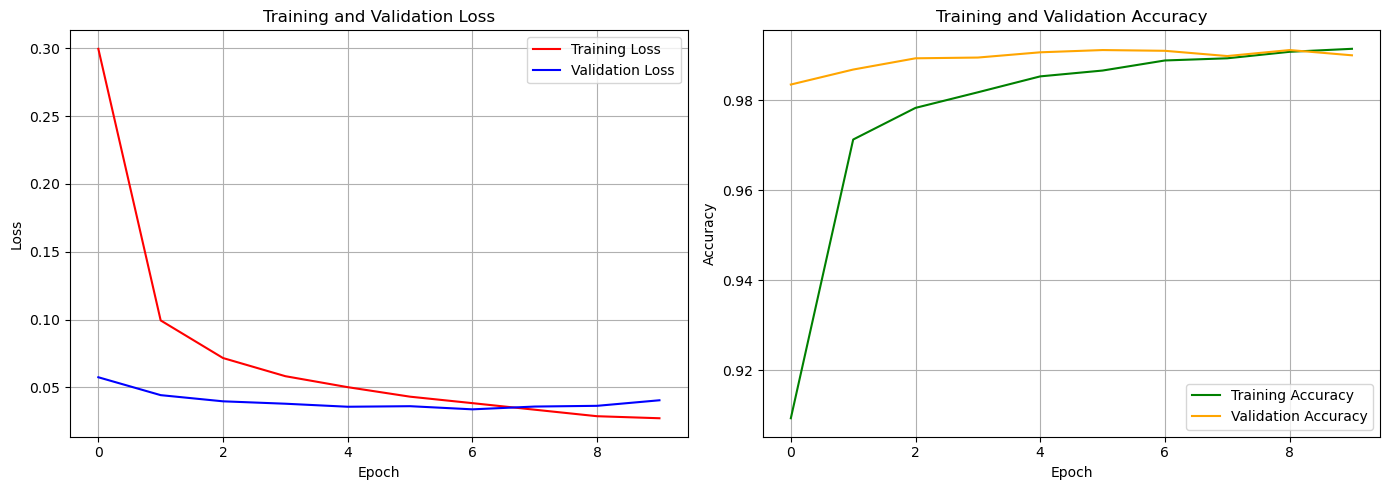

In [37]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss', color='red')
axes[0].plot(history.history['val_loss'], label='Validation Loss', color='blue')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].legend()
axes[0].grid(True)

# Accuracy plot
axes[1].plot(history.history['accuracy'], label='Training Accuracy', color='green')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training and Validation Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()

In [27]:
# Confusion Matrix
cm = confusion_matrix(Y_test_classes, Y_pred_classes)

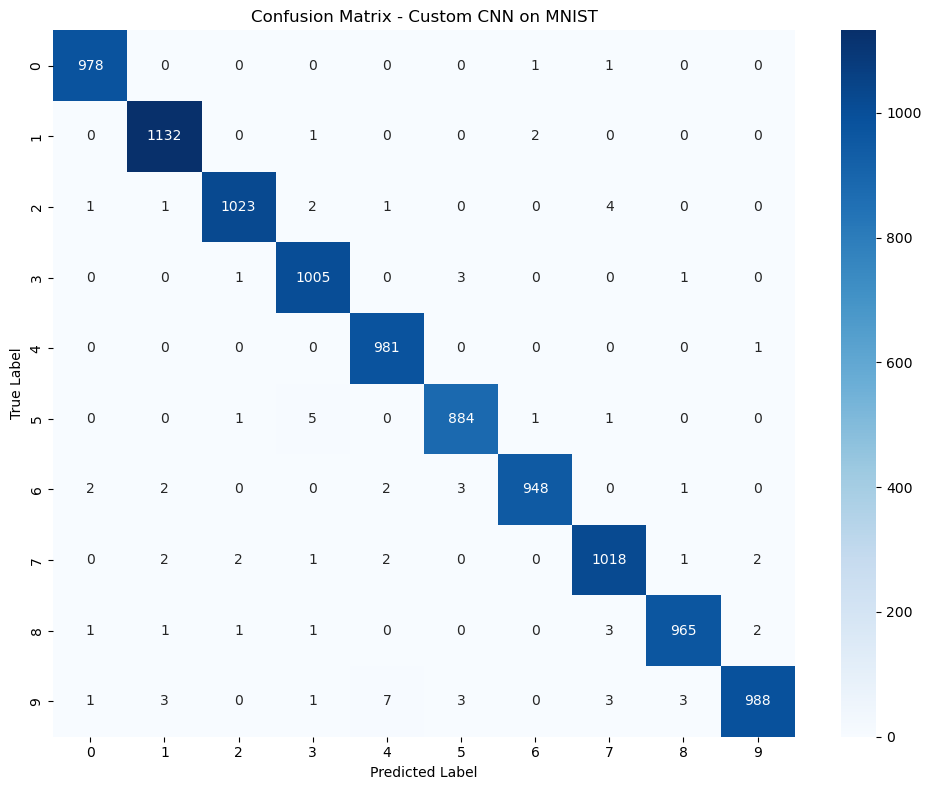

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Custom CNN on MNIST')
plt.tight_layout() 

In [29]:
# Classification Report 
print("CLASSIFICATION REPORT") 
print(classification_report(Y_test_classes, Y_pred_classes, 
                          target_names=[str(i) for i in range(10)]))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## PART 6: VISUALIZE LEARNED FILTERS

In [30]:
print("\n[6] Visualizing learned filters from first Conv layer...")


[6] Visualizing learned filters from first Conv layer...


In [31]:
# Get weights from first convolutional layer
first_layer_weights = model.layers[0].get_weights()[0]
# Shape: (3, 3, 1, 32) - (height, width, input_channels, output_filters)

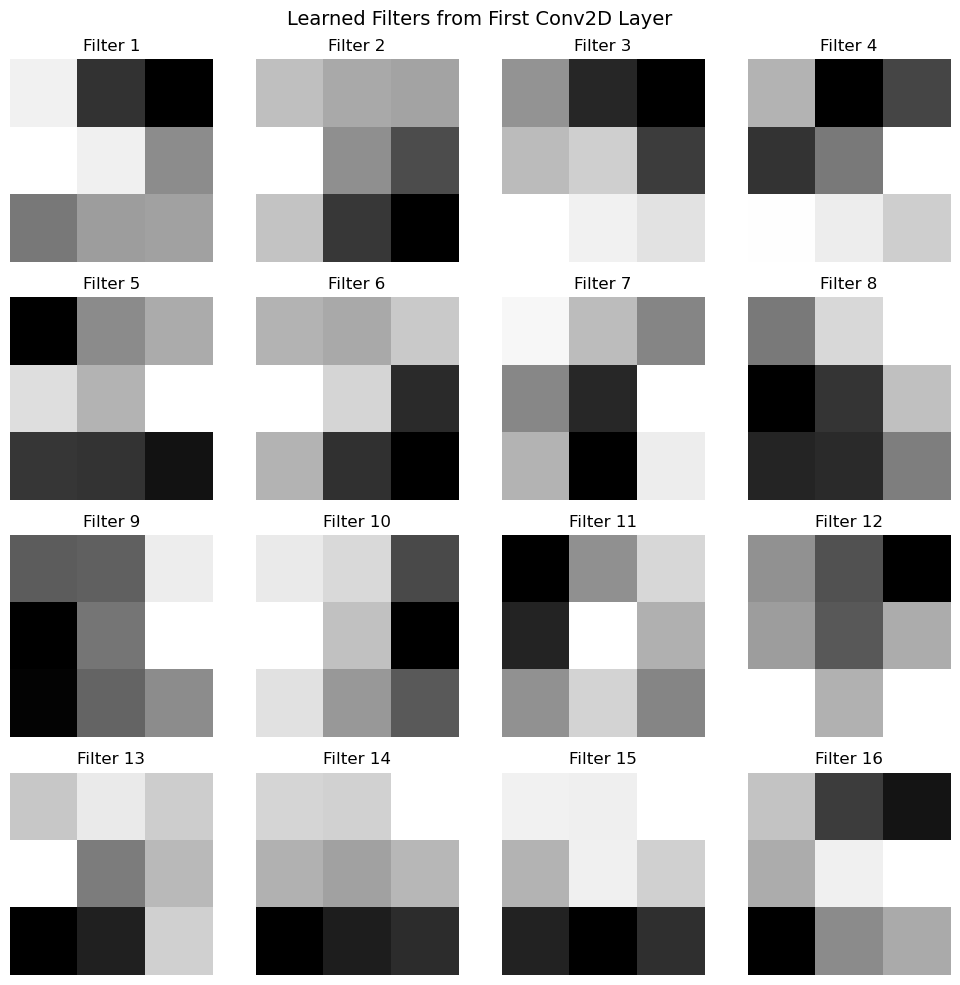

In [32]:
# Plot first 16 filters
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < 16:
        # Extract filter and squeeze channel dimension
        filter_img = first_layer_weights[:, :, 0, i]
        ax.imshow(filter_img, cmap='gray')
        ax.set_title(f'Filter {i+1}')
    ax.axis('off')
plt.suptitle('Learned Filters from First Conv2D Layer', fontsize=14)
plt.tight_layout()

## PART 7: SAMPLE PREDICTIONS

In [33]:
print("\n[7] Sample predictions...")
n_samples = 10
indices = np.random.choice(len(Xtest), n_samples, replace=False)


[7] Sample predictions...


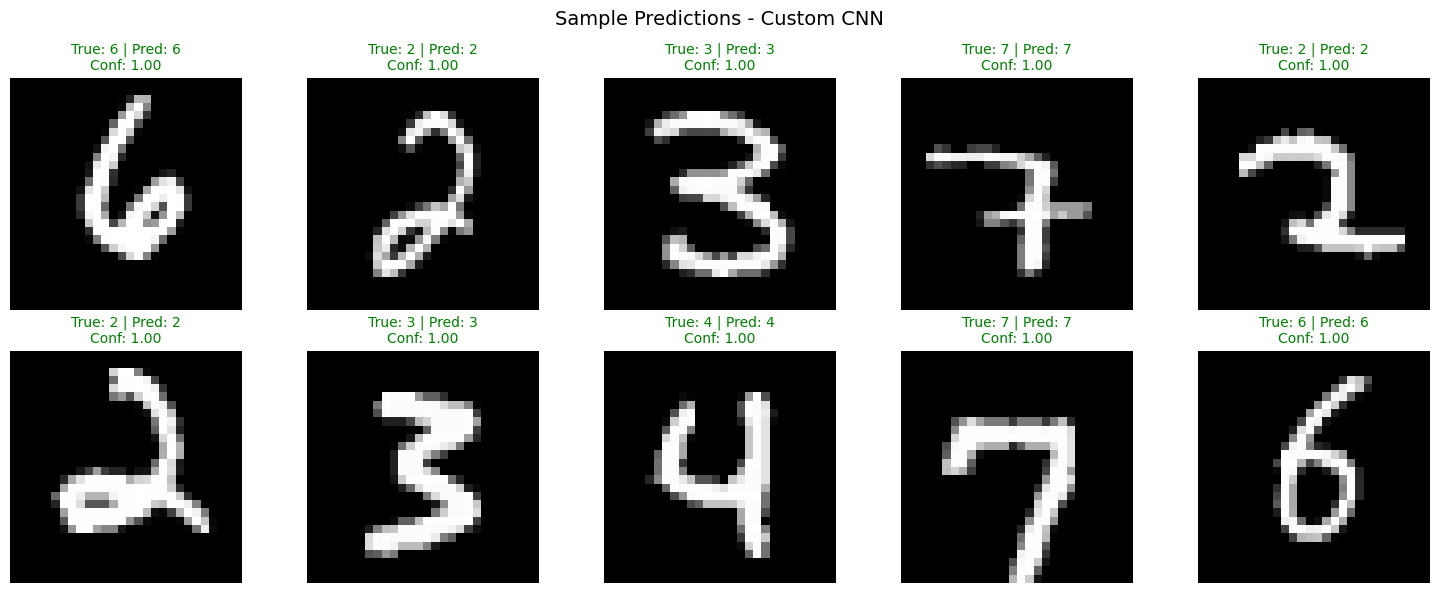

In [34]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for idx, ax in zip(indices, axes.flat):
    # Show original image
    ax.imshow(Xtest[idx].squeeze(), cmap='gray')
    true_label = Ytest[idx]
    pred_label = Y_pred_classes[idx]
    confidence = Y_pred[idx][pred_label]
    
    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f'True: {true_label} | Pred: {pred_label}\nConf: {confidence:.2f}',
                color=color, fontsize=10)
    ax.axis('off')
plt.suptitle('Sample Predictions - Custom CNN', fontsize=14)
plt.tight_layout()

In [35]:
print("CUSTOM CNN TRAINING COMPLETE")
print("="*70)
print(f"Architecture: Conv2D → MaxPool → Conv2D → MaxPool → Flatten → Dense")
print(f"Total Parameters: {model.count_params():,}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Training Loss Decreased: {final_loss < initial_loss}")

CUSTOM CNN TRAINING COMPLETE
Architecture: Conv2D → MaxPool → Conv2D → MaxPool → Flatten → Dense
Total Parameters: 225,034
Test Accuracy: 0.9922
Training Loss Decreased: True


<hr style="border: 2px solid #4CAF50;"> 
<h3>Extensions and Student Exercises</h3>

<h4>1. Architecture Experiments</h4>
<ul>
  <li><b>Add layers</b>: Try 3-4 Conv2D layers</li>
  <li><b>Filter variations</b>: Use 16, 32, 64, 128 filters</li>
  <li><b>Kernel sizes</b>: Experiment with 3×3, 5×5, 7×7</li>
  <li><b>Pooling</b>: Compare MaxPooling vs AveragePooling</li>
</ul>

<h4>2. Regularization</h4>
<ul>
  <li><b>Dropout</b>: Add dropout layers (0.2, 0.3, 0.5)</li>
  <li><b>Batch Normalization</b>: Add after Conv layers</li>
  <li><b>Data augmentation</b>: Rotation, shifting, zoom</li>
</ul>

<h4>3. Hyperparameter Tuning</h4>
<ul>
  <li><b>Learning rate</b>: Try 0.0001, 0.001, 0.01</li>
  <li><b>Batch size</b>: Test 16, 32, 64, 128</li>
  <li><b>Optimizers</b>: Compare Adam, SGD, RMSprop</li>
</ul>

<h4>4. Try Other Datasets</h4>
<ul>
  <li>Fashion-MNIST (clothing items)</li>
  <li>CIFAR-10 (color images)</li>
  <li>Cats vs Dogs (binary classification)</li>
</ul>

<h4>Challenge</h4>
<ul>
  <li>Achieve <b>99%+ accuracy</b> on MNIST test set</li>
  <li>Build model with <b>&lt;10K parameters</b></li>
</ul>

<hr>
<h4><center>Happy coding</center></h4>